<a href="https://colab.research.google.com/github/Prayag79/Deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn ## nn contains all of Pytorchs building blocks for neural network
import matplotlib.pyplot as plt

In [22]:
# create known parameters
weight = 0.7
bias = 0.3


# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10] , len(X) , len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [23]:
#Test train split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [24]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  #plot test data
  plt.scatter(test_data, test_labels ,c = 'r' , s = 4 , label = 'Testing data')

  #are there any predictions ?
  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=4,label='Predictions')

  plt.legend(prop={'size':14})


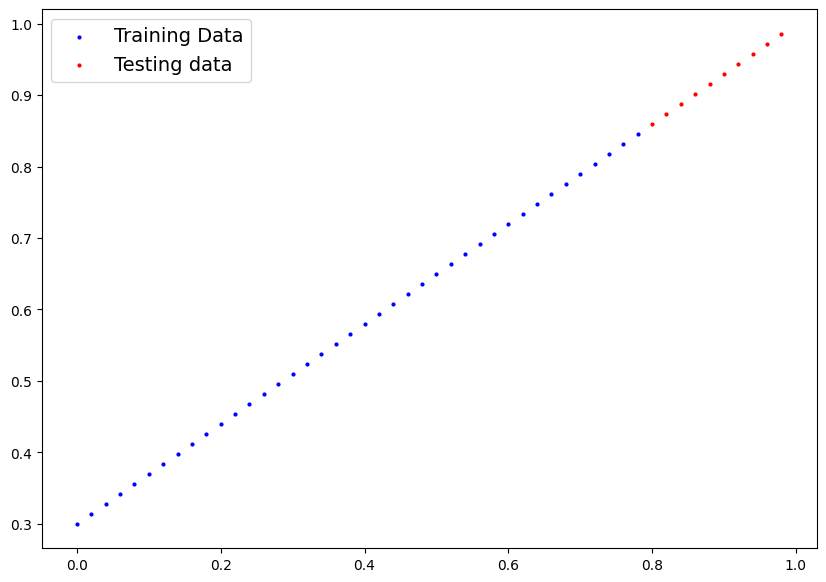

In [25]:
plot_predictions()

In [26]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  def forward(self,x:torch.Tensor) -> torch.Tensor: #Performs computation at step
    return self.weights * x + self.bias


In [27]:
torch.manual_seed(42)
model_0 = LinearRegressionModelV1()
list(model_0.parameters())#as a list


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()#as a dict

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
X_test , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [30]:
#predictions
with torch.inference_mode():#turns off grad or torch.no_grad()
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

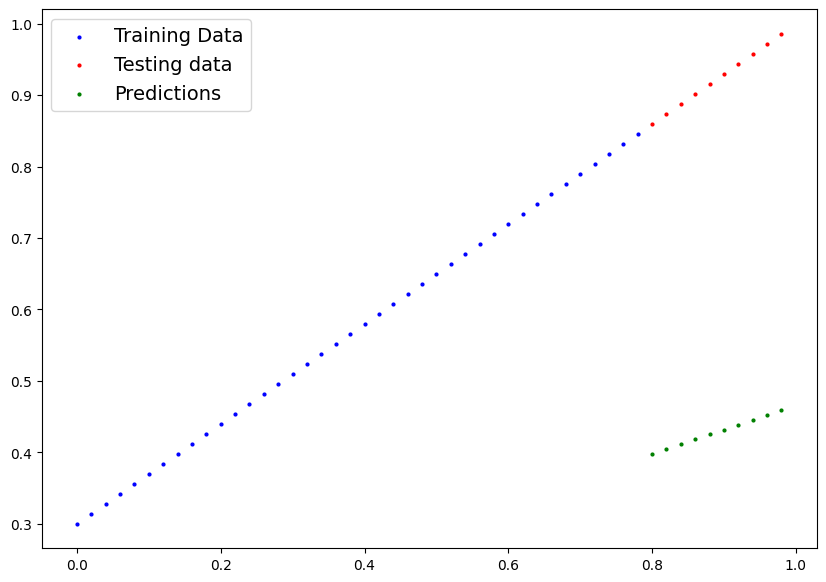

In [31]:
plot_predictions(predictions=y_preds)

In [32]:
#Loss Function ---> to measure how wrong your model performs.
#optimiser : takes into account of our loss function and adjust the models parameters(here bias and weight)
#we need a training loop and testing loop in pyTorch

In [33]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [34]:
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)                          #learning rate hyperparameter (lr x= change)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [35]:
#loop
#forward pass
#calculate loss
#optimize
#loss backward
#optimiser step

In [36]:
torch.manual_seed(7)
epoch_count = []
loss_values = []
test_loss_values = []
train_loss_values = []
epochs = 1000 #epochs is a loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()


  y_pred = model_0(X_train)#Forward pass
  loss = loss_fn(y_pred,y_train)#calc loss

  #print(f'loss : {loss}')



  optimizer.zero_grad()

  loss.backward()
  optimizer.step()# by defauld optimizer changes will get accumulated throught the loop .... we thus have to zero them (done above) for the next iteration

  model_0.eval()#testing loop
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 100== 0 :
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}')
    print(model_0.state_dict())





Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch : 100 | Loss : 0.024458957836031914 | Test Loss : 0.05646304413676262
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})
Epoch : 200 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch : 300 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch : 400 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch : 500 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch : 600 | Loss : 0.008932482451200485 | Test Loss : 0.005023092031478882
OrderedDict({'weights': tensor([0.6951]), 'bias': te

In [37]:
test_loss_values,train_loss_values

([array(0.48106518, dtype=float32),
  array(0.05646304, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32),
  array(0.00502309, dtype=float32)],
 [array(0.31288138, dtype=float32),
  array(0.02445896, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32)])

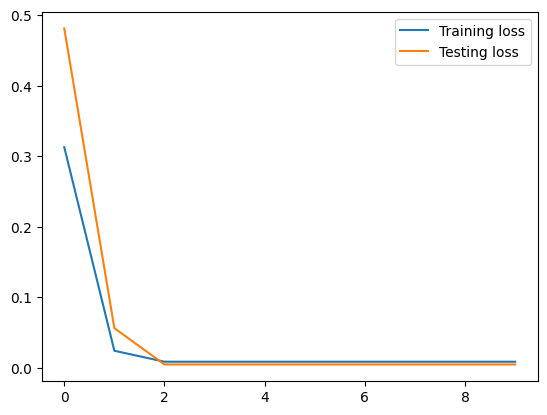

In [38]:
plt.plot(train_loss_values,label='Training loss')
plt.plot(test_loss_values,label='Testing loss')
plt.legend()

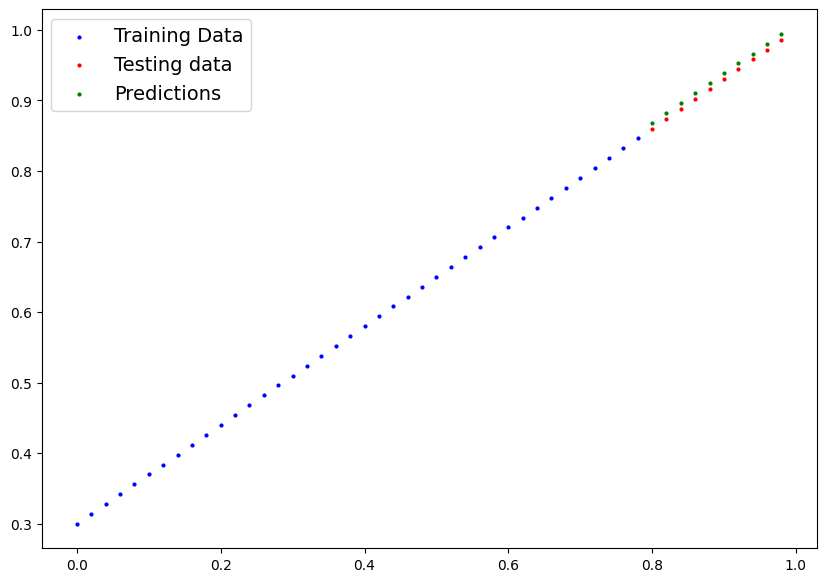

In [39]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [42]:
#saving the model
'''
torch.save()--->saves the model in pytorch pickel format
torch.load()--->loads the model
torch.nn.Module.load_state_dict()---->loads the model state dict
'''

'\ntorch.save()\ntorch.load()\ntorch.nn.Module.load_state_dict()\n'

In [50]:
from pathlib import Path

#create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)


#save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f'saving model to : {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


saving model to : models/01_pytorch_workflow_model_0.pth


In [55]:
# Load out model
loaded_model_0 = LinearRegressionModelV1()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [56]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [58]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds - model_0(X_test)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SubBackward0>)